In [1]:
## Import Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk import word_tokenize,sent_tokenize,TweetTokenizer,RegexpTokenizer



import warnings
warnings.filterwarnings('ignore')

In [69]:
train=pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/train.csv')
test=pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/test.csv")

In [70]:
train.shape  , test.shape

((159571, 8), (153164, 2))

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [71]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.iloc[0,1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,075bd9b9449da9a0,"Chaffing Balls wouldn't itch, they would burn ..."
freq,1,1


In [11]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [12]:
test.dtypes

id              object
comment_text    object
dtype: object

### Null Values

In [13]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [14]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

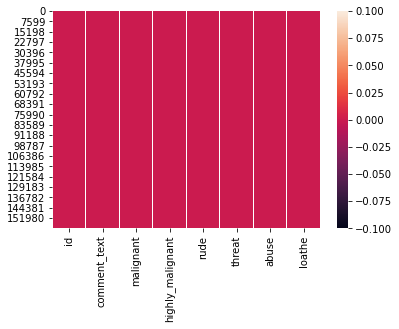

In [15]:
sns.heatmap(train.isnull())

## No Null vlaues present in train and test dataset

### Do we have any correlation within data

<AxesSubplot:>

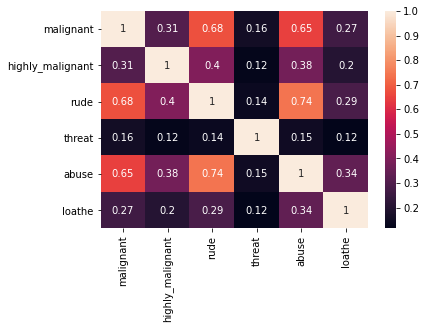

In [16]:
sns.heatmap(train.corr(),annot=True,linecolor='white')

In [17]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [18]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [19]:
## Lets jumple tha train dataset first

train=train.reindex(np.random.permutation(train.index))

In [20]:
# Read the target features

train['malignant'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

MALIGNANT
0    0.904156
1    0.095844
Name: malignant, dtype: float64


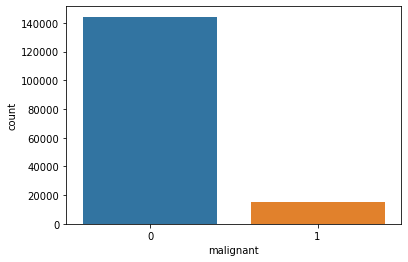

************************************************** 

**************************************************
HIGHLY_MALIGNANT
0    0.990004
1    0.009996
Name: highly_malignant, dtype: float64


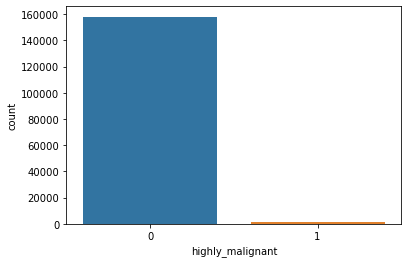

************************************************** 

**************************************************
RUDE
0    0.947052
1    0.052948
Name: rude, dtype: float64


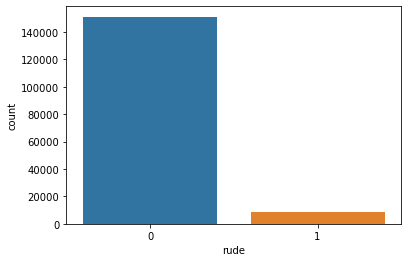

************************************************** 

**************************************************
THREAT
0    0.997004
1    0.002996
Name: threat, dtype: float64


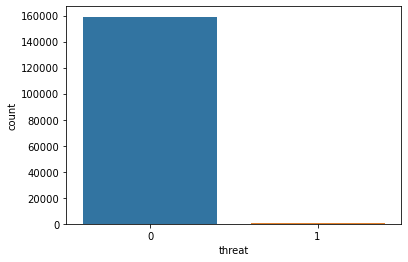

************************************************** 

**************************************************
ABUSE
0    0.950636
1    0.049364
Name: abuse, dtype: float64


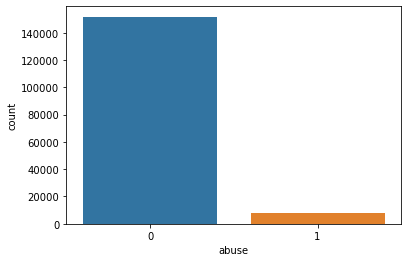

************************************************** 

**************************************************
LOATHE
0    0.991195
1    0.008805
Name: loathe, dtype: float64


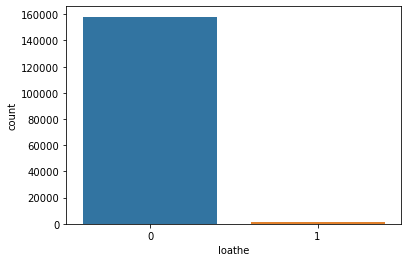

************************************************** 

**************************************************


In [21]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

for i in column:
    print(i.upper())
    print(train[i].value_counts(normalize=True))
    sns.countplot(train[i])
    plt.xlabel(i)
    plt.show()
    print('*'*50,'\n')
    print('*'*50)
   

In [22]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train['malignant'].sum()

15294

In [23]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False)


,count
malignant,15294
rude,8449
abuse,7877
highly_malignant,1595
loathe,1405
threat,478


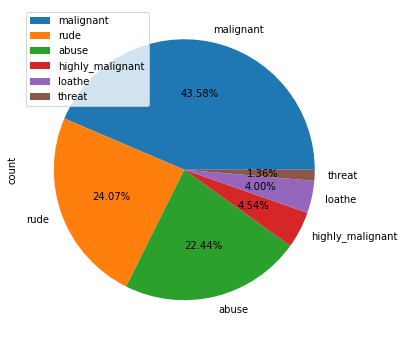

In [24]:
train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False).plot.pie(y='count',autopct='%1.2f%%',figsize=(6,6)).legend(loc='upper left')

In [25]:
train['comment_text']

142746    In fairness\n\nYou seem like a great guy, but ...
93071     The article 'Relativistic jet' was merged with...
90767     Yeh this TheJPS is TOTALLY crooked... she/he h...
65412     Some of the still-open really old discussions ...
18940     "==Note==\n\nI have emailed Christopher Ward's...
                                ...                        
43126     "\n\nRegarding the page Nelson Mandela, please...
125962    "\n Wow, serious stick-up-the-ass-itis. But se...
19773     ASAP Mob's singles \n\nShould we add ASAP Mob'...
82885     Welcome!\n\nHello, , and welcome to Wikipedia!...
133393    And as fully expected, yet another abusive adm...
Name: comment_text, Length: 159571, dtype: object

In [26]:
# Length of comment

train['length']=train['comment_text'].str.len()

In [27]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
142746,fb7744257366a162,"In fairness\n\nYou seem like a great guy, but ...",0,0,0,0,0,0,161
93071,f8d783f4703c1836,The article 'Relativistic jet' was merged with...,0,0,0,0,0,0,416
90767,f2d441165dc522f6,Yeh this TheJPS is TOTALLY crooked... she/he h...,0,0,0,0,1,0,379
65412,af057c17f75d163d,Some of the still-open really old discussions ...,0,0,0,0,0,0,271
18940,3200b2d56dc40c40,"""==Note==\n\nI have emailed Christopher Ward's...",0,0,0,0,0,0,226


In [28]:
## We will replace all email addresses within text into EMAIL

In [68]:
text="""My name is mohit tomer and my email is mohit.tomar@gmail.com """
import re
t=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',text)
t

'My name is mohit tomer and my email is EMAIL '

In [30]:
# ID feature all are unique values which will not help for any prediction. Drop it

train['id'].nunique() , train['id'].count()

(159571, 159571)

In [31]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

target_data=train[column]
target_data.head(2)

,malignant,highly_malignant,rude,threat,abuse,loathe
142746,0,0,0,0,0,0
93071,0,0,0,0,0,0


In [32]:
train[column].sum(axis=1)

142746    0
93071     0
90767     1
65412     0
18940     0
         ..
43126     0
125962    1
19773     0
82885     0
133393    1
Length: 159571, dtype: int64

In [33]:
train['target']=train[column].sum(axis=1)

In [34]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
142746,fb7744257366a162,"In fairness\n\nYou seem like a great guy, but ...",0,0,0,0,0,0,161,0
93071,f8d783f4703c1836,The article 'Relativistic jet' was merged with...,0,0,0,0,0,0,416,0
90767,f2d441165dc522f6,Yeh this TheJPS is TOTALLY crooked... she/he h...,0,0,0,0,1,0,379,1
65412,af057c17f75d163d,Some of the still-open really old discussions ...,0,0,0,0,0,0,271,0
18940,3200b2d56dc40c40,"""==Note==\n\nI have emailed Christopher Ward's...",0,0,0,0,0,0,226,0


In [35]:
train['target'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: target, dtype: int64

In [36]:
train['target'].unique()

array([0, 1, 3, 4, 2, 5, 6], dtype=int64)

In [37]:
train['target'].dtype

dtype('int64')

In [38]:
train['target']=train['target']>0   # It saved boolean values into target feature
train['target']=train['target'].astype(int)

In [39]:
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
142746,fb7744257366a162,"In fairness\n\nYou seem like a great guy, but ...",0,0,0,0,0,0,161,0
93071,f8d783f4703c1836,The article 'Relativistic jet' was merged with...,0,0,0,0,0,0,416,0


In [40]:
train['target'].value_counts()

0    143346
1     16225
Name: target, dtype: int64

### Target Feature id the comment is Magligant or not

<AxesSubplot:xlabel='target', ylabel='count'>

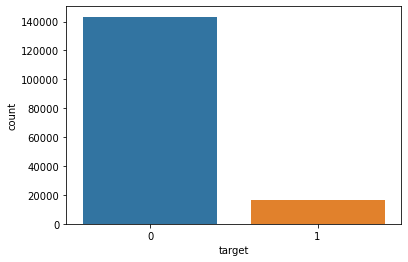

In [41]:
sns.countplot('target', data=train)

### Data Preprocessing of comment_text

In [42]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# replace emailids to EMAIL, remove stop words and lemmatize

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer=PorterStemmer()
lemmit= WordNetLemmatizer()

In [44]:
corpus=[]

for i in range(len(train)):
    review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',train['comment_text'][i])
    review=re.sub('[^a-zA-Z0-9]',' ',train['comment_text'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)
    

In [45]:
corpus[0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired 89 205 38 27'

In [46]:
corpus[2]

'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info'

In [47]:
type(corpus)

list

In [73]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### Test- Preprocessing

In [74]:
test_data=[]

for i in range(len(test)):
    review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',test['comment_text'][i])
    review=re.sub('[^a-zA-Z0-9]',' ',test['comment_text'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=" ".join(review)
    test_data.append(review)
    

In [75]:
test_data[0]

'yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap ur pethedic white face get kiss as guy sicken ja rule pride da music man dont dis shit nothin wrong bein like tupac brother fuckin white boy get thing right next time'

# LETS CONVERT WORDS INTO VECTORS

### TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=10000)
X= tf.fit_transform(corpus).toarray()

In [49]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## COnvert Test data into Vectors

In [76]:
input_data=tf.transform(test_data).toarray()
input_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y=train['target']
y

142746    0
93071     0
90767     1
65412     0
18940     0
         ..
43126     0
125962    1
19773     0
82885     0
133393    1
Name: target, Length: 159571, dtype: int32

In [51]:
X.shape  , y.shape

((159571, 10000), (159571,))

In [52]:
X.shape , y.shape

((159571, 10000), (159571,))

### Machine Learning Model

# MultinomialNB 

In [54]:
# Train and Test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [55]:
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((127656, 10000), (31915, 10000), (127656,), (31915,))

In [56]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

In [57]:
#prediction
y_pred=spam_detect_model.predict(x_test)


In [58]:
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score

In [59]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9000469998433338


In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     31909
           1       0.00      0.00      0.00         6

    accuracy                           0.90     31915
   macro avg       0.50      0.45      0.47     31915
weighted avg       1.00      0.90      0.95     31915



# LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [57]:
from sklearn.linear_model import LogisticRegression
spam_detect_LR = LogisticRegression().fit(x_train, y_train)

In [58]:
#prediction
y_pred=spam_detect_LR.predict(x_test)

In [59]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9011749960833464


In [60]:
# Confusion Matrix

<AxesSubplot:>

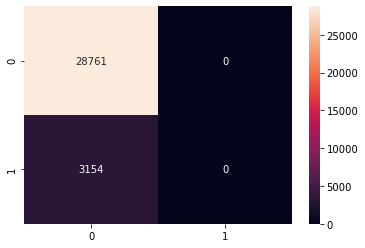

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')

In [62]:
# AUC ROC Plot

In [63]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

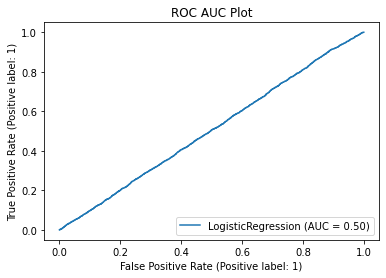

In [64]:
plot_roc_curve(spam_detect_LR,x_test,y_test)
plt.title('ROC AUC Plot')

In [ ]:
# Saving Model

In [65]:
import joblib
joblib.dump(spam_detect_LR,"Malignant_comment.pkl")

['Malignant_comment.pkl']

In [ ]:
# We have Selected Logistic Regression.

# DEcision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


spam_detect_DT = DecisionTreeClassifier().fit(x_train, y_train)
y_pred=spam_detect_DT.predict(x_test)

score=accuracy_score(y_test,y_pred)
print(score)

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier


spam_detect_KNN = KNeighborsClassifier().fit(x_train, y_train)
y_pred=spam_detect_KNN.predict(x_test)

score=accuracy_score(y_test,y_pred)
print(score)

0.8909603634654552


# SVC

In [ ]:
from sklearn.svm import SVC

spam_detect_SVC = SVC().fit(x_train, y_train)
y_pred=spam_detect_SVC.predict(x_test)

score=accuracy_score(y_test,y_pred)
print(score)

# Test data Preprocessing and test

# Test data using Model to predict if SMS is Malignant is or not

In [77]:
input_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
import pickle
loaded_model=joblib.load(open('Malignant_comment.pkl','rb'))

In [79]:
loaded_model.predict(input_data)

array([0, 0, 0, ..., 0, 0, 0])